## C1_W2_Lab02_Multiple_variable_Scrapbook

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import copy


In [31]:
# f_wb = np.dot(w, x) + b
# features: size, bedrooms, floors, age

X_train = np.array([[2104, 5, 1, 45],
                    [1416, 3, 2, 40],
                    [852, 2, 1, 35]])

y_train = np.array([[460],
                    [232],
                    [178]])

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")

w_init = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618]).reshape(1, -1)
b_init = 785.1811367994083

print(f"w_init: {w_init.shape}, b_init: {b_init}")

X_train: (3, 4), y_train: (3, 1)
w_init: (1, 4), b_init: 785.1811367994083


In [32]:
def predict_single_loop(x, w, b):
    """
    single loop prediction using linear regression

    Args:
        x: example with multiple input features Shape (n,)
        w: weights of the model (vector, shape (n,))
        b: (scalar) bias of the model

    Returns:
        p: (scalar) prediction of the model
    """

    n = x.shape[1]
    p = 0
    for i in range(n):
        p += w[0, i] * x[i]
    p += b
    return p


Above is a looped version of a single prediction for y, given w, b, and a single example.  Loop through all n features and provide weight for each.  

The fully vectorised version calculates the same thing for m examples:

In [35]:
def predict(X, w, b):
    """  
    Predicts output for training data, using w

    Args:
        X: nd_array, shape (m, n) Training set with m examples, n features
        w: nd_array, shape (1, n): row vector containing n weights
        b: scalar: bias

    Returns:
        p: nd_array, shape(m, 1): estimates based on w, b
    """

    p = np.dot(w, X.T) + b
    p = p.reshape(-1, 1)
    
    return p



The inner product (dot product), is commutative:

In [36]:
print(np.dot(w_init, X_train.T) + b_init)
print(np.dot(X_train, w_init.T) + b_init)
print(predict(X_train, w_init, b_init))
print(f'Shape of prediction: {predict(X_train, w_init, b_init).shape}')


[[459.99999762 231.99999837 177.99999899]]
[[459.99999762]
 [231.99999837]
 [177.99999899]]
[[459.99999762]
 [231.99999837]
 [177.99999899]]
Shape of prediction: (3, 1)


In [37]:
def compute_cost(X, y, w, b):
    """
    Computes the cost of using w as the weight vector for linear regression to fit the data points in X and y

    Args:
        X: matrix of input features (shape: m, n)
        y: vector of output values (shape: m, 1)
        w: weight vector (shape: 1, n)
        b: bias (scalar)

    Returns:
        cost: the cost of the model

    Calls:
        predict(X, w, b): returns p (shape: m, 1)
    """

    m = X.shape[0]
    #print(f'm  ={m}')
    f_wb = predict(X, w, b)
    #print(f'f_wb={f_wb}, shape={f_wb.shape}')
    diff = f_wb - y
    #print(f'diff={diff}')
    diff_2 = diff**2
    #print(f'diff_2={diff_2}')

    cost = 1 / (2 * m) * np.sum((f_wb - y)**2)

    return cost


In [21]:
print(f'cost={compute_cost(X_train[:,:].reshape(-1,4), y_train[:].reshape(-1,1), w_init, b_init)}')

cost=1.5578904045996674e-12


In [22]:
print(f'X_train[0,:]={X_train[0,:].reshape(1,4)}, shape={X_train[0,:].reshape(-1,4).shape}')
print(f'y_train[0]={y_train[0]}, shape={y_train[0].reshape(-1,1).shape}')

X_train[0,:]=[[2104    5    1   45]], shape=(1, 4)
y_train[0]=[460], shape=(1, 1)


In [38]:
def gradient_descent(X, y, w_init, b_init, alpha, numiter):
    """
    Function to calculate optimal w, b for inputs X containing n features

    Args:
        X: nd_array (m, n): Training sample 
        y: nd_array (m, 1): column vector containing training targets
        w_init: nd_array (1, n): row vector containing initial guesses for weights
        b_init: scalar: guess for initial bias
        alpha: scalar: learning rate
        numiter: scalar: number of iterations for gradient descent.

    Calls:
        predict(X, w, b): returns p (shape: m, 1))

    Returns:
        w: nd_array (1, n): row vector containing optimised weights
        b: scalar: optimised bias
        J_history: nd_array (1, numiter): row vector containing updates of cost as a function of iterations.

    Makes Use of:
        copy.deepcopy: to create a deep copy of w_init without reference to original
    """

    w = copy.deepcopy(w_init)
    b = b_init    
    J_history = []

    m = X.shape[0]

    for i in range(numiter):
        p = predict(X, w, b)
        err = p - y
        tmp_w = w - alpha * np.dot(err.T, X) / m
        tmp_b = b - alpha * np.sum(err.T) / m
        w = tmp_w
        b = tmp_b
        J_history.append(compute_cost(X, y, w, b))

    return w, b, J_history

In [39]:
w_init = np.zeros_like(w_init).reshape(1, 4)
print(f'w_init.shape = {w_init.shape}')
b_init = 0.0
alpha = 5.0e-7
num_iter = 1000

w, b, J_history = gradient_descent(X_train, y_train, w_init, b_init, alpha, num_iter)

print(f'w = {w}, b = {b}')
print(f'J_history = {J_history[::50]}')

w_init.shape = (1, 4)
w = [[ 0.20396569  0.00374919 -0.0112487  -0.0658614 ]], b = -0.002235407530932534
J_history = [2529.4629522316336, 696.5286570158305, 695.9903158352028, 695.4543329617287, 694.9206979323058, 694.3894003302576, 693.8604297851191, 693.3337759724437, 692.8094286135915, 692.2873774755218, 691.7676123706057, 691.2501231564086, 690.7348997354993, 690.2219320552454, 689.7112101076165, 689.2027239289896, 688.6964635999458, 688.1924192450781, 687.6905810327936, 687.1909391751242]


In [40]:
def plot_cost(J_history):
    """
    Function to plot cost as a function of iterations

    Args:
        J_history: nd_array (1, numiter): row vector containing updates of cost as a function of iterations.

    Returns:
        None
    """

    plt.plot(J_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost vs Iterations')
    plt.show()

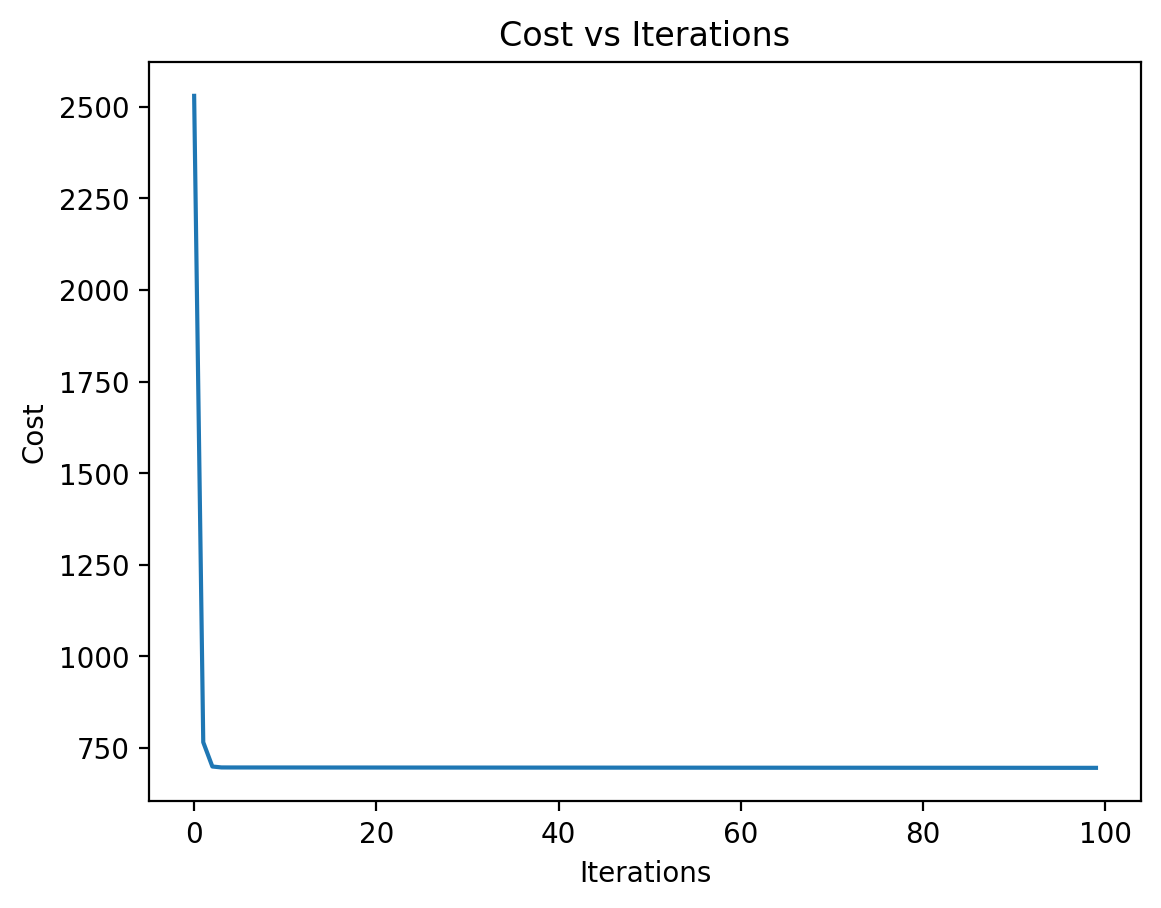

In [42]:
plot_cost(J_history[0:100])

In [43]:
def load_data(filename):
    """
    Function to load data from a file

    Args:
        filename: string: name of file to load data from

    Returns:
        X: nd_array (m, n): Training sample 
        y: nd_array (m, 1): column vector containing training targets
    """

    data = np.loadtxt(filename, delimiter=',')
    X = data[:, :-1]
    y = data[:, -1].reshape(-1, 1)

    return X, y

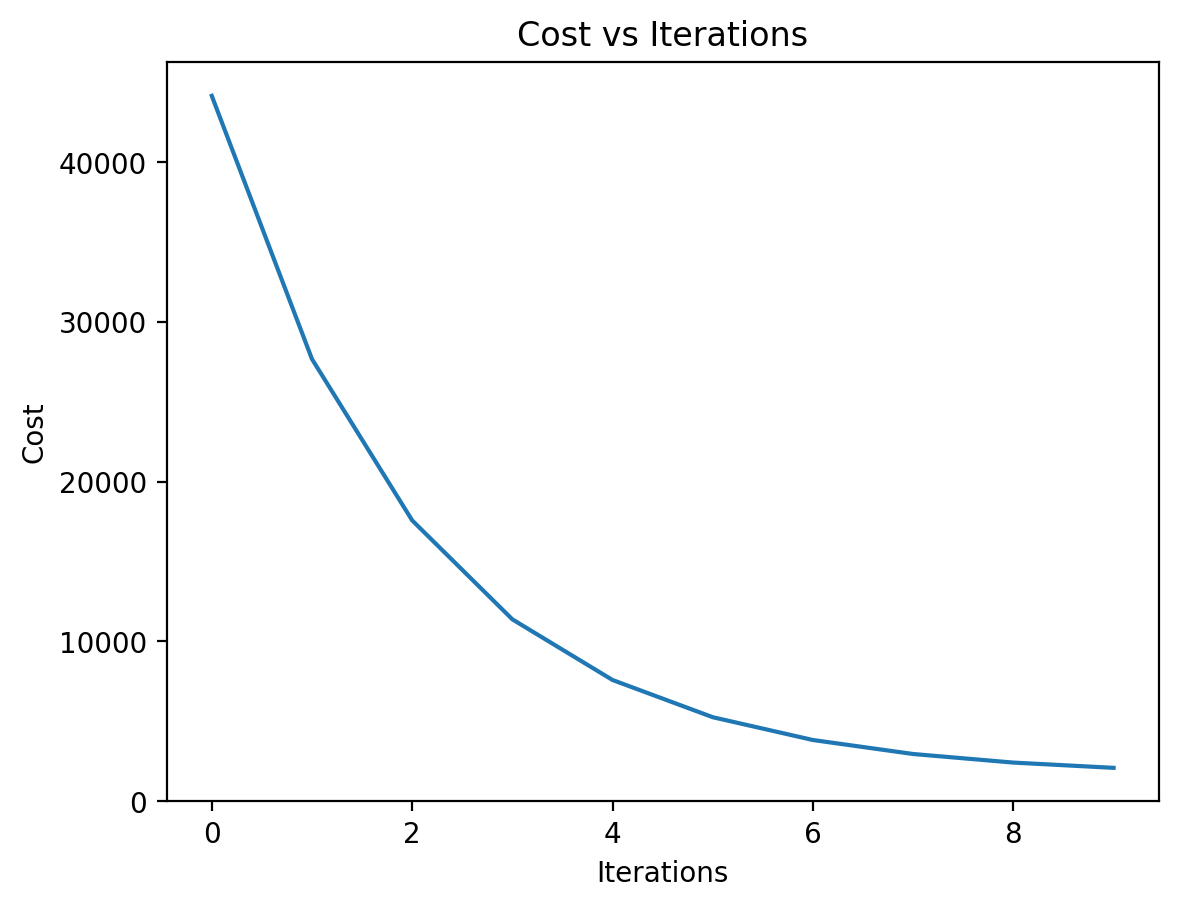

In [52]:
X, y = load_data('data/houses.txt')
labels = ['size', 'bedrooms', 'floors', 'age']

w_init = np.zeros((1, 4))
b_init = 0.0
alpha = 1e-7
num_iter = 10

w, b, J_history = gradient_descent(X, y, w_init, b_init, alpha, num_iter)

plot_cost(J_history)

In [47]:
print(X[:10, :])

[[9.520e+02 2.000e+00 1.000e+00 6.500e+01]
 [1.244e+03 3.000e+00 1.000e+00 6.400e+01]
 [1.947e+03 3.000e+00 2.000e+00 1.700e+01]
 [1.725e+03 3.000e+00 2.000e+00 4.200e+01]
 [1.959e+03 3.000e+00 2.000e+00 1.500e+01]
 [1.314e+03 2.000e+00 1.000e+00 1.400e+01]
 [8.640e+02 2.000e+00 1.000e+00 6.600e+01]
 [1.836e+03 3.000e+00 1.000e+00 1.700e+01]
 [1.026e+03 3.000e+00 1.000e+00 4.300e+01]
 [3.194e+03 4.000e+00 2.000e+00 8.700e+01]]
